In [15]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:00<00:00, 313MB/s]
100% 163M/163M [00:00<00:00, 282MB/s]


In [20]:
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [21]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3397.jpg', 'with_mask_2584.jpg', 'with_mask_3250.jpg', 'with_mask_2790.jpg', 'with_mask_1630.jpg']
['with_mask_897.jpg', 'with_mask_806.jpg', 'with_mask_3673.jpg', 'with_mask_3133.jpg', 'with_mask_2499.jpg']


In [22]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1177.jpg', 'without_mask_2317.jpg', 'without_mask_3029.jpg', 'without_mask_3277.jpg', 'without_mask_155.jpg']
['without_mask_3714.jpg', 'without_mask_2257.jpg', 'without_mask_2589.jpg', 'without_mask_3272.jpg', 'without_mask_1185.jpg']


In [25]:
print('Number of with mask images: ',len(with_mask_files))
print('Number of without mask images: ',len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


## Creating Labels for the two class of images

### with mask --> 1

### without mask --> 0

In [27]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [28]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [29]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Displaying The Images

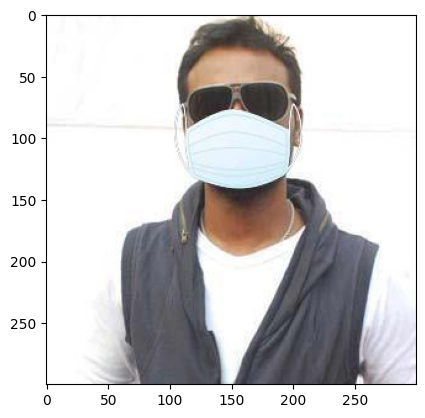

In [31]:
img = mpimg.imread('/content/data/with_mask/with_mask_897.jpg')
imgplot = plt.imshow(img)
plt.show()

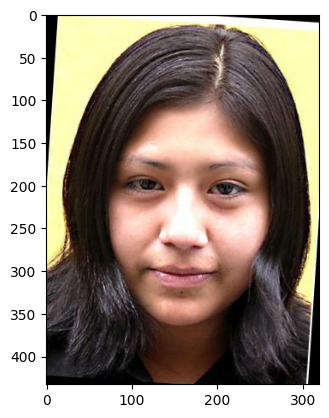

In [32]:
img = mpimg.imread('/content/data/without_mask/without_mask_1177.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image Processing

### Resize the images

### Convert the images to numpy arrays

In [33]:
# Convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
len(data)

7553

In [36]:
type(data[0])

numpy.ndarray

array([[[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[238, 230, 219],
        [237, 229, 218],
        [234, 226, 215],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 229, 217],
        [235, 227, 216],
        [234, 224, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 230, 218],
        [235, 227, 216],
        [233, 224, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
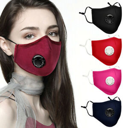

In [35]:
data[0]

In [40]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


## Train Test Split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[218, 219, 214],
        [218, 219, 214],
        [218, 219, 214],
        ...,
        [208, 210, 207],
        [208, 210, 207],
        [208, 210, 207]],

       [[218, 219, 214],
        [218, 219, 214],
        [218, 219, 214],
        ...,
        [208, 210, 207],
        [208, 210, 207],
        [208, 210, 207]],

       [[217, 218, 213],
        [217, 218, 213],
        [217, 218, 213],
        ...,
        [208, 210, 207],
        [208, 210, 207],
        [208, 210, 207]],

       ...,

       [[217, 223, 210],
        [217, 215, 197],
        [222, 219, 196],
        ...,
        [236, 217, 181],
        [222, 196, 148],
        [242, 201, 170]],

       [[219, 220, 213],
        [218, 213, 198],
        [224, 220, 194],
        ...,
        [217, 193, 147],
        [238, 212, 167],
        [226, 178, 129]],

       [[220, 218, 216],
        [219, 211, 199],
        [223, 218, 190],
        ...,
        [214, 182, 126],
        [226, 201, 159],
        [207, 154,  86]]], dtype=uint8)
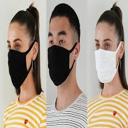

In [46]:
X_train[0]

In [47]:
X_train_scaled[0]

array([[[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       ...,

       [[0.85098039, 0.8745098 , 0.82352941],
        [0.85098039, 0.84313725, 0.77254902],
        [0.87058824, 0

## Building a Convolutional Neural Networks(CNN)

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [51]:
# compile the neural networks
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [52]:
# training the neural network
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4190 - acc: 0.8223 - val_loss: 0.2744 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2817 - acc: 0.8895 - val_loss: 0.2391 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2183 - acc: 0.9163 - val_loss: 0.2441 - val_acc: 0.8876
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1986 - acc: 0.9286 - val_loss: 0.2327 - val_acc: 0.8959
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1477 - acc: 0.9443 - val_loss: 0.2516 - val_acc: 0.9074


## Model Evaluation

In [53]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Loss: ',loss)
print('Test Accuracy: ',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2538 - acc: 0.9120
Test Loss:  0.25382348895072937
Test Accuracy:  0.9119788408279419


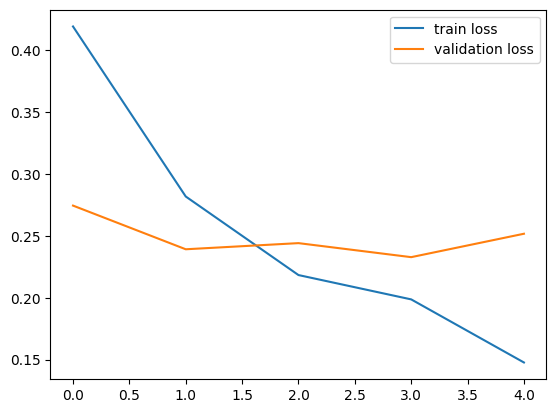

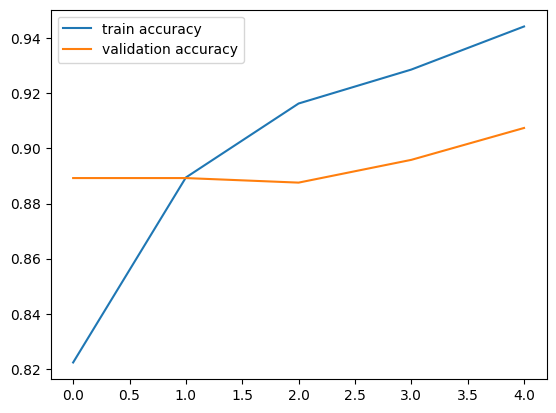

In [57]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label = 'validation accuracy')
plt.legend()
plt.show()

## Predictive System

path of the image to be predicted: /content/images (1).jpeg


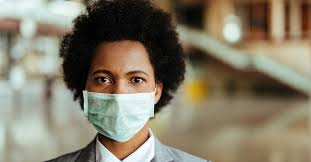

1/1 [==============================] - 0s 17ms/step
[[0.3756796 0.9338622]]
1
The Person is Waring The Mask


In [63]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The Person is Waring The Mask')
else:
  print('The Person is Not Wearing The Mask')